#### Plotting LST over time

##### Bukit Purmei 2022

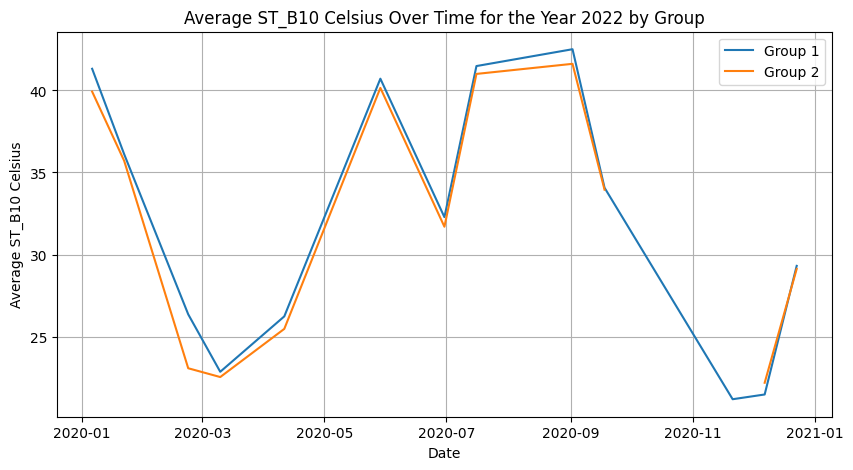

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
file_path = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\BukitPurmei\BukitPurmei_Filtered_2020_Blocks.csv"

# Read the CSV file
bukit_purmei_2022_df = pd.read_csv(file_path)

# Convert 'time' to datetime and filter for the year 2022
bukit_purmei_2022_df['time'] = pd.to_datetime(bukit_purmei_2022_df['time'])

# Map blocks to grouped blocks
block_group_map = {
    'polygon_112': 'Group 1',
    'polygon_114': 'Group 1',
    'polygon_113': 'Group 2',
    'polygon_115': 'Group 2'
}
bukit_purmei_2022_df['group'] = bukit_purmei_2022_df['block'].map(block_group_map)

# Group by 'group' and 'time', and calculate the average ST_B10_Celsius
grouped_data = bukit_purmei_2022_df.groupby(['group', bukit_purmei_2022_df['time'].dt.date])['ST_B10_Celsius'].mean().unstack(0)

# Plotting
plt.figure(figsize=(10, 5))
for column in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[column], label=column)
plt.title('Average ST_B10 Celsius Over Time for the Year 2022 by Group')
plt.xlabel('Date')
plt.ylabel('Average ST_B10 Celsius')
plt.grid(True)
plt.legend()
plt.show()

##### Tampines 2022 - 2024

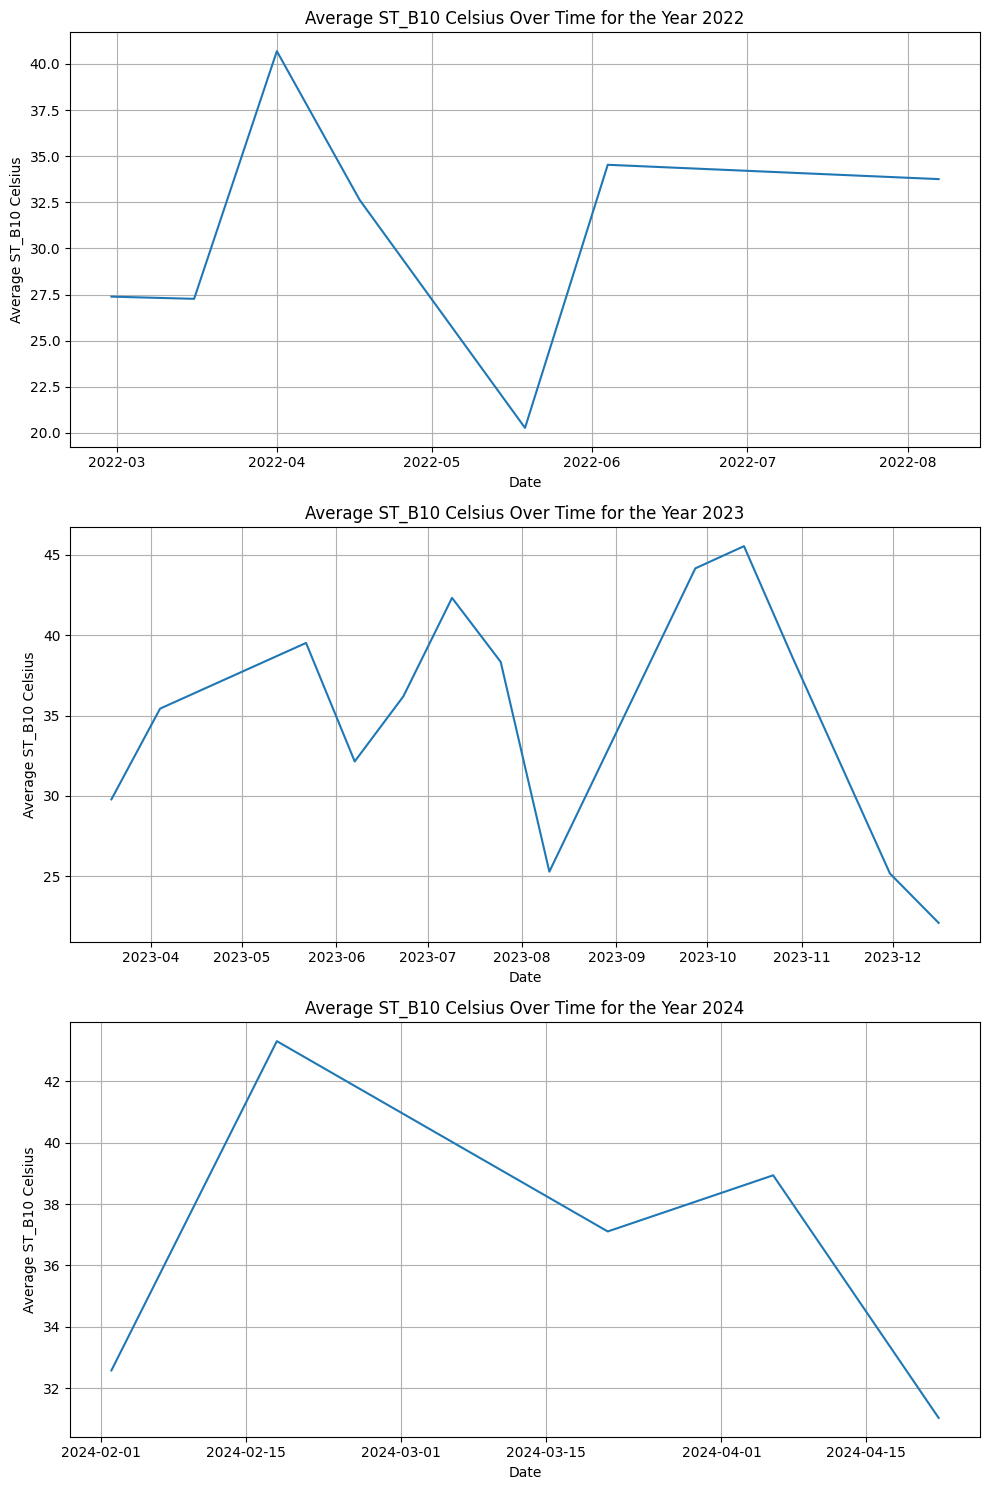

In [5]:
# Tampines 2022 - 2024

import pandas as pd
import matplotlib.pyplot as plt

# Path to the CSV file
file_path = r"C:\LocalOneDrive\Documents\Desktop\MTI\UHI-Project\MSE-ES-UHI\Data\FilteredData\Tampines\Tampines_Filtered_2022_to_2024.csv"

# Read the CSV file
data = pd.read_csv(file_path)

# Convert 'time' to datetime
data['time'] = pd.to_datetime(data['time'])

# Prepare the plot
fig, ax = plt.subplots(3, 1, figsize=(10, 15))  # 3 plots, one for each year

# Loop through each year and plot data
for i, year in enumerate([2022, 2023, 2024]):
    # Filter for the year
    data_year = data[data['time'].dt.year == year]

    # Group by 'time' and calculate the average
    average_surface_area = data_year.groupby(data_year['time'].dt.date)['ST_B10_Celsius'].mean()

    # Plotting
    ax[i].plot(average_surface_area.index, average_surface_area.values)
    ax[i].set_title(f'Average ST_B10 Celsius Over Time for the Year {year}')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Average ST_B10 Celsius')
    ax[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()